## Credit Card Fraud detection using ML algorithms

According to ACI Worldwide and Aite Group in 2016, about 1 in 3 consummers globally have been a victim of card fraud in the past five years. Their report futher emphasizes that 14 of the 17 countries surveyed experienced an increase in card fraud between 2014 and 2016. The same year, iovation/Aite Group study projected that credit card fraud will lead to a lose in about $10 billion in the United States alone in 2020.

### About dataset
The datasets contains transactions made by credit cards in a European city. The dataset presents transactions that occurred in two months containing 492 fraudulent transaction 284,807 transactions. 

### Actions
Predict if a transaction is fraudulent or not.

### My question: which ML algorithms should I use? An anomaly detection or supervised learning?
We will address it in the following


In [6]:
# Activte my env!
!conda activate Tensorflow36

In [8]:
# Loading packages

import sys
import scipy.stats as stats
#!pip install --user --upgrade numpy==1.16.4
import numpy as np
#!pip install --user --upgrade pandas==0.19.2
import pandas as pd
print("pandas version:", pd.__version__)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import LogFormatter 
import seaborn as sns
from collections import Counter
!pip install mglearn
import mglearn


pandas version: 1.0.5


ERROR: Could not find a version that satisfies the requirement mglearn (from versions: none)
ERROR: No matching distribution found for mglearn


ModuleNotFoundError: No module named 'mglearn'

### Load Data from CSV FILE

In [10]:
# Loading Data
credit_card = pd.read_csv('C:/Users/adjanni/OneDrive/Desktop/Copy_EMGS_Desktop/Machine_Learning_Course/Projects/Credit_card_fraud/creditcard.csv')

# Summarising the shape of the dataset
print(f"The shape of the data is: ", credit_card.shape[0], "rows and ", credit_card.shape[1], "columns.")

# Investigate the key of the dataset
print(" Credit card key: \n{}".format(credit_card.keys()))

The shape of the data is:  284807 rows and  31 columns.
 Credit card key: 
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


### Data Preprocessing and visualization

In [11]:
# Access information
print(pd.DataFrame(credit_card.dtypes, columns=['dtypes']))

# Quick overview of the dataset
print(credit_card.sample(5))

# Check for missing values
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{credit_card.isnull().sum()}")

         dtypes
Time    float64
V1      float64
V2      float64
V3      float64
V4      float64
V5      float64
V6      float64
V7      float64
V8      float64
V9      float64
V10     float64
V11     float64
V12     float64
V13     float64
V14     float64
V15     float64
V16     float64
V17     float64
V18     float64
V19     float64
V20     float64
V21     float64
V22     float64
V23     float64
V24     float64
V25     float64
V26     float64
V27     float64
V28     float64
Amount  float64
Class     int64
            Time        V1         V2        V3        V4        V5        V6  \
276517  167144.0 -0.894489   0.775620 -1.272765 -0.719766  1.318849 -1.304564   
203641  134901.0  1.543755  -1.785569  0.171220 -0.427366 -1.611070  0.728810   
225284  144188.0  2.094812  -0.960708 -0.451298 -0.773632 -1.076954 -0.619976   
24616    33304.0 -7.223174 -14.042468 -2.941294  6.387264 -5.329067  2.971903   
284231  172262.0  0.059172   0.185131 -1.097582 -0.872261 -0.274999 -0.308147   

 

Most of the features are float. The Class, however, has only integer value. The features include Time, V1--V28, and Amount. The target is the Class column.

There is zero missing value in the dataset. It has been well processed!


### Explanation of the features

##### V1...V28: 
Each of this feature is the result of the PCA transformation of the original transaction. 

##### Amount
This is the transaction amount. It has not been transformed with PCA

##### Time
This is the number of seconds elapsed between transactions in the dataset. It corresponds to 02 months.

##### Class
Represents the response variable and takes value of 1 for fraudulent transactions, 0 otherwise

Total dataset Counter({0.0: 284315, 1.0: 492})
Class 0.0 Percentage 99.82725143693798
Class 1.0 Percentage 0.1727485630620034


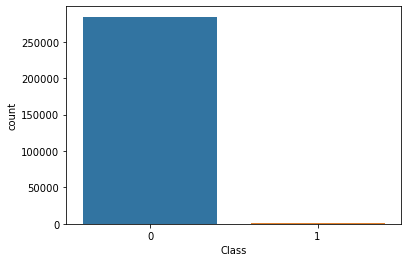

In [12]:
### Summarise the class distribution
target = credit_card.values[:, -1]
counter = Counter(target)
print("Total dataset", counter)

for k, v in counter.items():
    perc = (v / float(len(target))) * 100
    print('Class', k, 'Percentage', perc)
    #print('Class = %d, Count = %d, Percentage = %.3f%%' % (k, v, perc))
    #sns.barplot( y = perc)

sns.countplot(x="Class", data=credit_card)

### Observation
The dataset has two classes:
    1. Normal transaction (y = 0) -- negative
    2. Fraudelent transaction (y = 1) -- positive

With about 99.82% of transactions marked as negative and about 0.1727% marked as positive, this inferes that the data are severely skewed -The learning algorithm will more likely predict y = 0. We should be extremely caution on the learning algorithm to use and the type of evaluation metric to use. 

## Shall we use an Unsurpervised Anomaly Detection or Supervised Learning??  
We observe the following:

    (.) Very small number of positive: 492. It corresponds to about 0.17% of the dataset
    (.) Large number of negative: 284315. It corresponds to 99.82% of the dataset

Based on these two initial observations and the labelled output, we suggest Supervised Anomaly Detection algorithms will provide an estimation with high probability. We will compare the performance of:
    
    (.) Collaborative filtering algorithm: K-nearest neigbor (KNN) 
    (.) Support Vector Machine (SVM)
    (.) Neural Network (NN)

Also, given the imbalance nature of the dataset, a good evaluation metric that will be computed are:

    (.) True positive (TP), false positive (FP), false negative (FN), true negative (TN)
    (.) Precision = TP/(TP + FP) - measure the quality of the data returned as positive
    (.) Recall = TP/(TP + FN) - how many true positives were detected as positive
    (.) F1-score
In the following, the quantification of the TP, FP, FN, and TN are represented by the 'Confusion Matrix'.

    
### Let s investigate the correlation between input variables

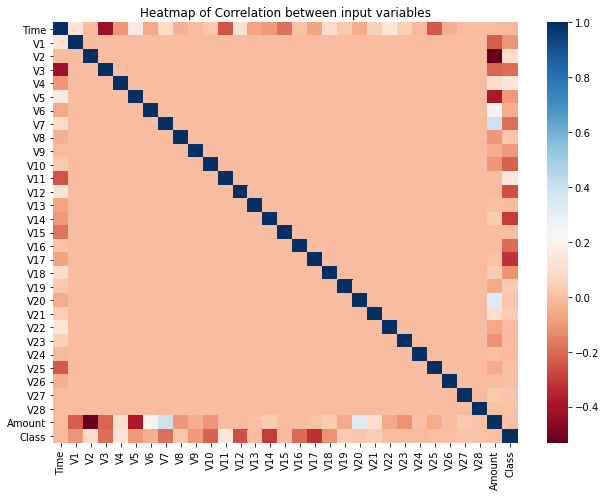

In [13]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(9,7)) 
sns.heatmap(credit_card.corr(), xticklabels=credit_card.corr().columns, yticklabels=credit_card.corr().columns, cmap="RdBu", ax = ax)
plt.title('Heatmap of Correlation between input variables')
plt.tight_layout()

We clearly see that there is no correlation between the input variables! However, looking at the correlation between 'Amount' and the client transaction V1--V28:

        (x)  The correlation coefficient between Amount-V7, Amount-V20 seem to be about 0.5. We should keep this in mind!

The correlation between Class and V1--V18 vary between -0.6 (V17 e.g) and 0.5 (V11). 

### Classes and target Extraction

In [14]:
# Extract negative and positive data
negative = credit_card[credit_card['Class'] == 0]
positive = credit_card[credit_card['Class'] == 1]

# Extract the target
target = credit_card.values[:, -1]

# Drop the last column
credit_card_d = credit_card.drop("Class", axis = 1)
pos = positive.drop("Class", axis = 1)
neg = negative.drop("Class", axis = 1)
print('Normal', neg.shape, 'Fraudulent', pos.shape)

Normal (284315, 30) Fraudulent (492, 30)


# Gaussian distribution of the features

Visualise the normal and fraudulent transaction on top of each other:
    
    (...) Normal transaction (blue)
    (...) Fraudulent transaction (red)

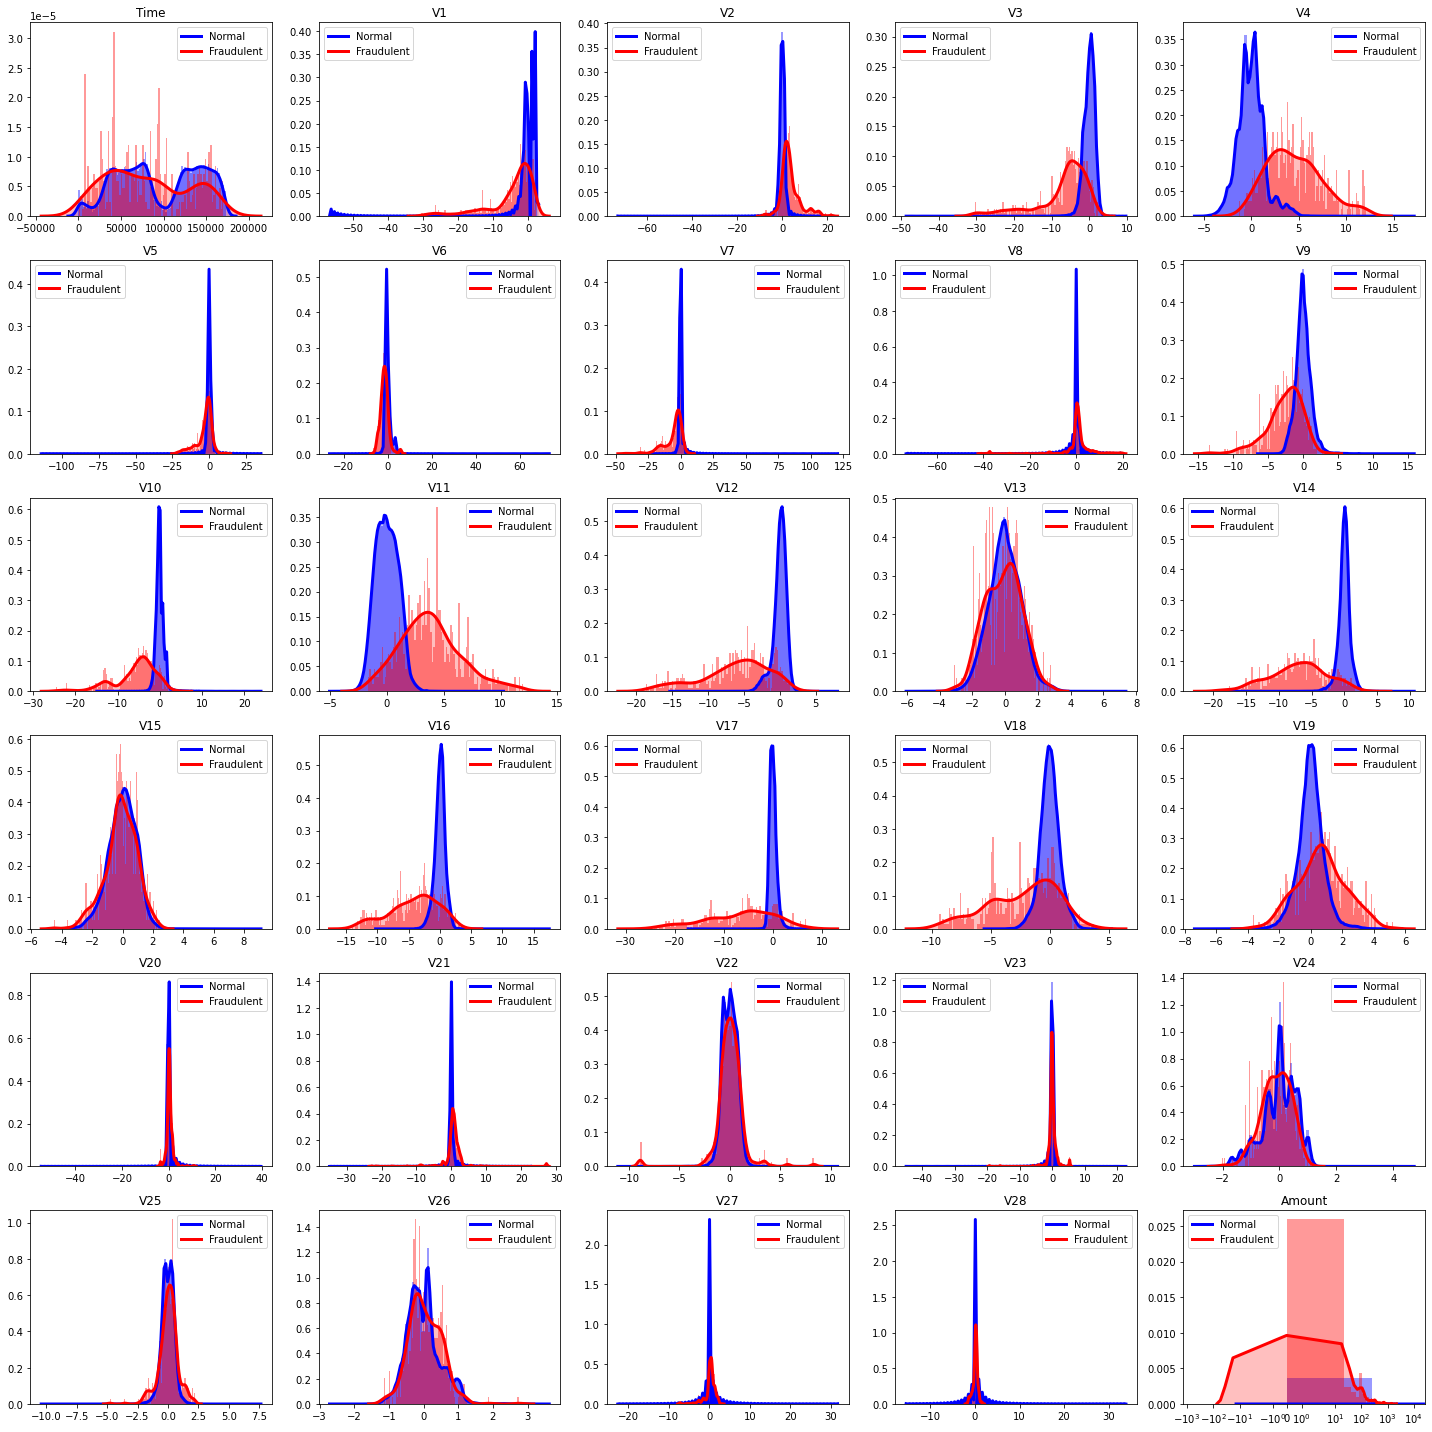

In [15]:
# We are going to plot 30 histograms, one for each variable
from matplotlib.ticker import LogFormatter

variables = list(neg.columns)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

for i, v in enumerate(variables):    
    # Set up the subplot
    ax = plt.subplot(6, 5, i + 1)
    if v in ['Amount']:
        sns.distplot(neg[v].values, kde_kws = {'shade': True, 'linewidth': 3, "label": "Normal"}, bins = 100, kde = True, ax = ax, color="b");
        sns.distplot(pos[v].values, kde_kws = {'shade': True, 'linewidth': 3, "label": "Fraudulent"}, bins = 100, kde = True, ax = ax, color="r");
        ax.set_xscale('symlog')
        # Formating log tick axis
        formatter = LogFormatter(labelOnlyBase = False, minor_thresholds = (1, 0.4)) 
        ax.get_xaxis().set_minor_formatter(formatter) 
        
        #ax.set_yscale('log')
        plt.title(v)
    else:
        sns.distplot(neg[v].values, kde_kws = {'shade': True, 'linewidth': 3, "label": "Normal"}, bins = 100, kde = True, ax = ax, color="b");
        sns.distplot(pos[v].values, kde_kws = {'shade': True, 'linewidth': 3, "label": "Fraudulent"}, bins = 100, kde = True, ax = ax, color="r");
        plt.title(v)
            
fig.tight_layout()
plt.show()

## Observation

Most of the PCA data are gaussian with the mean centered around 0. This means that the variables were standardised as part of the PCA transformation. Let's look closely at some inputs.

    (1) Time - The data were collected over a period of two months. The normal transaction (blue) shows two considerable throughs that could be associated to the end of the previous/ and begining/ of a new month. After that dip, the density increases, hit a plateau, and decreases as the month is coming to an end. The Fraudulent transaction, however, has almost a constant density throughout the two months. The spendings are made at an equal level regardless of the period of the month. Can this feature help to differenciate the fraud from the real transaction?

Concerning the histogram plots of the features V1 - V28, 02 groups can be identified. For example:

    (S1) The one where the there is a clear difference between the normal and fraudulent transaction. For example
    
        (1) the subgroup (V4, V11, V19) and (V3, V10, V14): The normal transaction density is center around 0 and the fraudulent either has negative or positive value. If we take V4 for example, the normal transaction varies between -5 and 5 whereas the fraudulent transactin has a mean equal to about 3 and varies between -5 and 15. This means that for V4, a transaction that falls between 5 and 15 will be considered as fradulent.
    
        (2) The subgroup (V18. V24, V25) in which the fraud and normal transactions seem to overlap. Unlike the previous subgroup, it is not easy to differenciate the two kinds of transaction. 

## Conclusion
We observe that there are many types/groups of positive data. This may suggest that future anomalies will more likely look different to the current ones. Hence, very difficult to predict. This obvervation contributes to demonstrate that anomaly detection algorithm instead of a superfised learning algorithm MUST be used!

Let s have access to a quick statiscal description of the data.

## Statiscal investigation of the features

In [16]:
# Investigate statiscal analys,is of the negative and positive data
display(neg['Amount'].describe())
display(pos['Amount'].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Observation
We can observe that the mean of fraudulent transaction is about 1.5 times higher that the normal transaction. Also, looking at the normal transaction, the mean suggests that the amount of money retrieved by customers is small. However, the maximum amount of money someone retrieved is 25691.16. May be this customer bought a car with his credit card! The direct consequence is that the dataset becomes skew.


# Working with large and skewed datasets 

    1. Take 5% of the datasets (to find the k-value) and divide them into Features and Target variable. I will work on this subset througout the hyperparameter tuning. Once the best model is identified, we can go ahead and use it in the entire dataset for training and subsequent model deployment.
    
    2. I will use 5-fold cross-validation with 1 repetition
    
    

## Extracting Features and Target variable

In [17]:
#  Features
X = credit_card_d;

# Choose 3% of the data for hyperparameters turming
fracs = 0.05

# Taking 5% of the datasets for testing purposes
X_red = credit_card_d.sample(frac = fracs, replace =False, random_state = 1)

# Target (expected class)
y = credit_card["Class"];
y_red = credit_card["Class"].sample(frac = fracs, random_state = 1)

# Extract the numpy array for processing purposes
X_data = X_red.values;
y_data = y_red.values;
print(" Full size of features ", X.shape, "Reduce size of the features is ", X_red.shape)
y_red[y_red==1]

 Full size of features  (284807, 30) Reduce size of the features is  (14240, 30)


235644    1
254344    1
192529    1
176049    1
42769     1
118308    1
23308     1
235616    1
191690    1
149600    1
143334    1
120837    1
128479    1
249963    1
189587    1
16863     1
272521    1
43773     1
84543     1
46918     1
Name: Class, dtype: int64

### Divide the dataset into Training and Test set
To evaluate my ML algorithm, the dataset are split into 02 parts:

    --  Training set: 70%
    --  Test set: 30% 

Before performing this division, we randomly sorted the dataset

In [18]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import metrics
from time import time

In [19]:
train_ratio = 0.7
#validation_ratio = 0.2
test_ratio = 0.3

# To keep the same result with every run
np.random.seed(0)

# split 70% and 30%
#Because the class is highly unbalanced and to ensure that the proportion of y is present in each split, we use
# stratify=y. Hence, the train and test sets will have an equal distribution.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=1 - train_ratio, random_state = 1, stratify = y_data);

print("Features-Training set shape", X_train.shape[0], "--Features-Test set shape ", X_test.shape[0], "--Y test set shape set ", y_test.shape[0])

Features-Training set shape 9967 --Features-Test set shape  4273 --Y test set shape set  4273


class value:  0 row index:  [   0    1    2 ... 9964 9965 9966]
class value:  1 row index:  [ 634 1196 1521 1846 3011 3656 3837 7009 7982 8420 8874 9122 9145 9858]


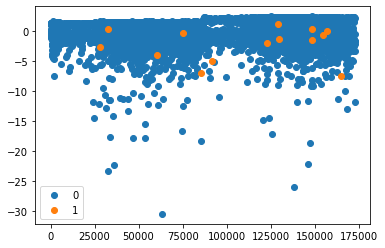

In [20]:
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs

def plot_dataset(X, y):
    # Create scatter plot for samples from each class
    n_classes = len(set(y))
    for class_value in range(n_classes):
        # get row indexes for samples with this class
        row_idx = where(y == class_value)[0]
        print("class value: ", class_value, "row index: ", row_idx)
        # Create scatter of these samples
        pyplot.scatter(X[row_idx, 0], X[row_idx, 1], label=str(class_value))
    # Show a legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
plot_dataset(X_train, y_train)        

# Features Scaling

Before making an actual predictions, it s always a good practice to scale the features so that all of them are on a similar scale. We remove the mean value of each feature and divide non-constant features by their standard deviationWe could use the following:

    (X - mu)/sigma2, mu == mean of the feature, sigma2 == the std of the feature
    
We will use instead import StandardScaler from Sklearn.preprocesing. The new features should range between about -1 and 1.


In [21]:
from sklearn import preprocessing

print("Before scaling", X_train[1])
# Compute the mean and standard deviation on a training set [-1 1]
scaler = preprocessing.StandardScaler().fit(X_train)

# Apply the feature scaling on x_train
X_train = scaler.transform(X_train)

# Reapply the same transformation on the test set
X_test = scaler.transform(X_test)
print("After scaling", X_train[1])

Before scaling [ 1.20152000e+05 -1.84898452e-01  1.14091730e-01  5.72912081e-02
 -2.44624386e+00  2.80862255e-01 -8.90723269e-01  6.37119423e-01
 -1.64840753e-01 -1.39736772e+00  3.32163737e-01  5.38848978e-01
 -1.44659304e-01  4.53257675e-01 -4.65416087e-02 -1.19942833e+00
  1.36615849e+00 -5.98338504e-01 -6.05385524e-01  5.55797323e-02
  2.09422482e-01  5.87552441e-01  1.67716803e+00 -2.20204999e-01
 -2.76378526e-01 -2.95573089e-01 -1.34633936e-01  3.96609260e-01
  2.51892135e-01  3.98500000e+01]
After scaling [ 0.52757639 -0.08863197  0.08378889  0.03616846 -1.73209243  0.20930797
 -0.66580357  0.53533519 -0.12709034 -1.2865489   0.30668453  0.53864108
 -0.14729029  0.45984016 -0.0635679  -1.32197584  1.58963885 -0.74189897
 -0.73143928  0.06009131  0.29062069  0.76053965  2.29153968 -0.38532459
 -0.44632729 -0.53443206 -0.29991544  0.93886511  0.78582885 -0.21277805]


# 1. Supervised Anomaly Detection: K-NN algorithm without turning hyperparameters


A key parameter in K-NN is the number K of nearest points to take. To help to find this values, we plot the graph of the K values between 1 and 50. The first step is to split the datasets into training and test set.



### Trial 1: K-NN with x_train & x_test

We will use the training set to build an accurate model. Then use the test set to report the accuracy of the model.


From the above plot, for k = 1, the prediction on the training set is perfect. However, as k increases, the training accuracy drops, indicating that using a single nearest neighbors leads to a model that is too complex!

However, looking at the test set, the maximum accuracy is obtained at k = 9. Above this value, it's constant until k = 17 and decreases afterwards until 23.  

K-value |  1
f1_score [0.99897039 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ] std f1_1 
 [0.00046784 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]

Time to completion:  1.69 Second 

K-value |  3
f1_score [0.99897039 0.99953194 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ] std f1_1 
 [0.00046784 0.00033089 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]

Time to completion:  3.33 Second 

K-value |  5
f1_score [0.99897039 0.99953194 0.99926605 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ] std f1_1 
 [0.00046784 0.00033089 0.00040521 0.         0.         0.
 0.  

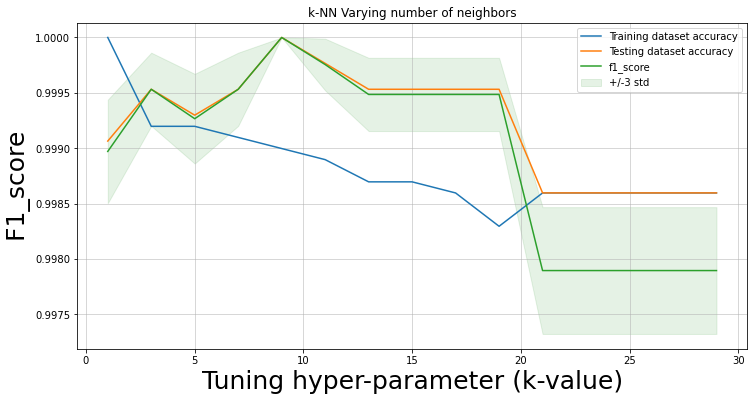

In [22]:
import multiprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time

# Getting the nber of CPUs in the pc
num_cpus = multiprocessing.cpu_count()

num_neighbors = 30
myList = list(range(0,num_neighbors))
neighbors = list(filter(lambda x: x%2!=0, myList)) 


train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
f1 = np.empty(len(neighbors))
std_f1 = np.empty(len(neighbors))

# Use iteration to calculate different k in models, then return the average err
error = []
    
for i, k in enumerate(neighbors):
    print("K-value | ", k )
    # Start time
    st_time = time.perf_counter()    
    
    # Build KNN model and choose n_neighbors = k - n_jobs specify the number of cores that need to be used in the process!
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = num_cpus -2)
    #training_score = cross_val_score(knn, X_train, y_train, cv=5)
    #cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    #x=plot_learning_curve(knn, X_train, y_train,i, (0.87, 1.01), cv=cv, n_jobs=4)
    #x.show()
    
    # Fit the model, knn, to tht Training set. I train my model with different values of "k" and capture its accuracy on my test data.
    knn.fit(X_train, y_train)
    #print("Model parameters ", knn)
    
    # Compute training and test accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
    # Evaluation of the model predictions against the test dataset
    # a-/ Get the predict value on test set
    y_pred = knn.predict(X_test)
    
    y_expect = y_test
    x_expect = X_test
    
    f1[i] = f1_score(y_expect, y_pred, average='weighted')
    std_f1[i] = np.std(y_pred == y_expect)/np.sqrt(y_pred.shape[0])
    
    print("f1_score", f1, "std f1_1 \n", std_f1)
    
    # Adds error rate of model woth various k-value (whenever y_pred is not matching the expected)
    error.append(np.mean(y_pred != y_expect))
    
    # Print error
    end_t = time.perf_counter()
   
    print(f'\nTime to completion: {end_t - st_time: .2f} Second \n')

# Generate plot
plt.figure(figsize=(12, 6))
plt.plot(neighbors, train_accuracy, label = "Training dataset accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing dataset accuracy")
plt.plot(neighbors, f1, label = "f1_score")
plt.fill_between(neighbors, f1 - 1 * std_f1, f1 + 1 * std_f1, alpha=0.10, color='green', label = "+/-3 std")

plt.legend()
plt.title('k-NN Varying number of neighbors')
plt.xlabel(' Tuning hyper-parameter (k-value) ', fontsize=25)
plt.ylabel(' F1_score ', fontsize=25)
plt.grid(linestyle='-', linewidth=0.5)
plt.show()

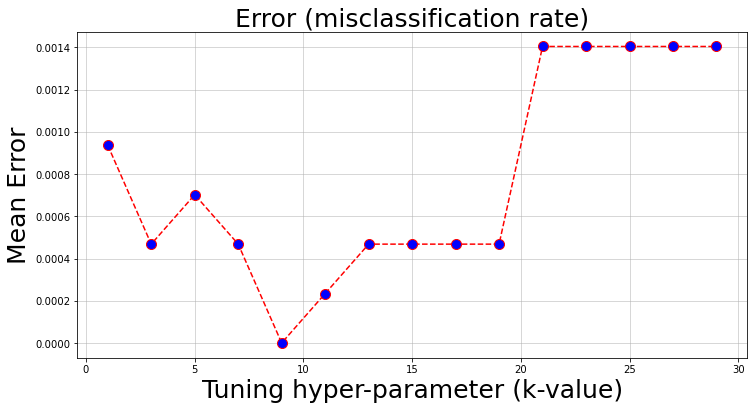

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(neighbors, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title("Error (misclassification rate)", fontsize=25)
plt.xlabel(" Tuning hyper-parameter (k-value) ", fontsize=25)
plt.ylabel("Mean Error", fontsize=25)
plt.grid(linestyle='-', linewidth=0.5)

In [24]:
Optimal_k = neighbors[error.index(min(error))]
print("The optimal k is:: ", Optimal_k)


The optimal k is::  9


## Display the classifier

## How accurately my model will predict the class label of a future unseen dataset?

I used the test data to determine the right value of k and the train set to find the nearest neighbors. The best accuracy (99.99%) is obtained for k = 5 on the test set which I also used to determine the optimal value of k. 

#### However, can I say, with confidence, that I can predict with 99.9% accuracy the future unseen label? The answer is obviously NO because I have no more data with me as I have split into 70:30 ratio. To address this issue, I neeed the cross validation set. 



## Find the optimal parameters by using GridSearch
GridSearch can find the best parameters for a classifier. In this case, I will use it for the KNN-algorithms and compared it with the value obtained with the previous methods.

##### Explanation k-fold fmethod
In k-fold cross-validation, the training set is randomly partioned into k equal size subsamples: $k-1$ training set and $1$ is used at every run as the validation set. 

For example, in the following, for 5-folds, I train on 4 of them and leave one out as validation set. The algorithm performs it 5 times (leave out every partition exactly once) and average the validation error across runs.
    
    (.) Model 1: the first Fold 1 is the validation set, and the 04 equal size fold are Training sets
    (.) Model 2: The second Fold 2 becomes the validation set and the first and the three others become the training set
    (.) ...
    (.) Model 5: The four first folds are the training set and the last one, the validation set.
    
In the following, we conduct a stratified 5-fold (n_splits = 5) cross-validation with 1 repetitions (n_repeats = 1) using the $RepeatedStratifiedKFold$ function. Since the target labels are very skewed with fewer fraudulent transaction labels than normal one, stratification ensures that the proportion of the two labels in both train and test sets are the same as the proportion in the full dataset in each cross-validation repetition.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Control how the knn neigbors are weighted while making a prediction.
# uniform = all points are weighted equally (default)
# distance = weighted close neigbors more heavily than far one
weight_options = ['uniform','distance']

cv_method = RepeatedStratifiedKFold(n_splits = 5,
                                   n_repeats = 1,
                                   random_state = 1)

# Define pipeline with two processes
pipe_KNN = Pipeline([('fselector', SelectKBest()),
                    ('knn', KNeighborsClassifier(n_jobs= 7))])

params_pipe_KNN = {'fselector__score_func': [f_classif, mutual_info_classif],
                  'fselector__k': [10, 20, X_train.shape[1]], # Select number of features
                  'knn__weights': weight_options, 
                  'knn__n_neighbors': list(range(1, 21, 2)),
                  'knn__p': [1, 2, 3, 5] }

# Tuning hyperparameters
gs_pipe_KNN = GridSearchCV(estimator = pipe_KNN,
                          param_grid = params_pipe_KNN,
                          cv = cv_method,
                          scoring = 'f1',
                          n_jobs = num_cpus -1,
                          verbose = 3)

In [26]:
from time import time

print("Fitting the classifiers to the training set")
t0 = time()

gs_pipe_KNN.fit(X_train, y_train)

print("done in %0.3fs" % (time() - t0))

Fitting the classifiers to the training set
Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=7)]: Done 114 tasks      | elapsed:   14.2s
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed:   46.2s
[Parallel(n_jobs=7)]: Done 498 tasks      | elapsed:  2.5min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  6.8min
[Parallel(n_jobs=7)]: Done 1138 tasks      | elapsed: 11.8min
[Parallel(n_jobs=7)]: Done 1554 tasks      | elapsed: 22.6min
[Parallel(n_jobs=7)]: Done 2034 tasks      | elapsed: 117.0min
[Parallel(n_jobs=7)]: Done 2400 out of 2400 | elapsed: 186.5min finished


done in 11191.662s


In [27]:
gs_pipe_KNN.best_params_

{'fselector__k': 10,
 'fselector__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'knn__n_neighbors': 7,
 'knn__p': 1,
 'knn__weights': 'distance'}


After stratified 5-fold cross-validation (cv) with no repetition, observe that the BEST performance is obtained with 10 features (instead of 30 in the whole dataset) selected by the F1-score with 7 neighbors using the "Manhattan" (p=1) distance metric. The mean cv accuracy with the optimal parameters can be extracted using $best\_score$ attribute:

In [28]:
gs_pipe_KNN.best_score_

0.7276190476190476

In [29]:
from sklearn.model_selection import cross_val_score

all_accuracies = []
cv_method = []

cv_method = RepeatedStratifiedKFold(n_splits = 5,
                                   n_repeats = 2,
                                   random_state = 1)


all_accuracies = cross_val_score(gs_pipe_KNN.best_estimator_ , X_train, y_train, cv = cv_method, scoring='f1')
print("All F1 score per fold: ", all_accuracies)
print("The mean: ", all_accuracies.mean()*100)
print("The standard deviation is: ", all_accuracies.std())



All F1 score per fold:  [0.4        1.         0.66666667 1.         0.57142857 1.
 0.85714286 1.         0.         0.66666667]
The mean:  71.61904761904762
The standard deviation is:  0.3131813207752654


## Discussion 

The mean F1_score is 48% and the std is 26%. This indicates that our model has lot of variability. This propably means that the model needs more training size to find significance. We are probably dealing with high variance issue in our model. 


### This is not a good model! 

## Saving The best Model

Once the pipeline has been executed and the best estimator obtaines, I will save it now.

In [30]:
# The parameters used in the depoyment are:
gs_pipe_KNN.best_estimator_

# Let's save the best model as "model_best_KNN" in a compressed format namely pickle
import joblib

joblib.dump(gs_pipe_KNN.best_estimator_, 'model_best_KNN.pkl', compress = 1)

['model_best_KNN.pkl']

### Just for fun!!!

Let's us get more from the cv results! we can call gs_pipe_KNN.cv_results which is a dictionary consisting of run details for each fold.

In [31]:
gs_pipe_KNN.cv_results_['mean_test_score'][1]

0.6666666666666667

We define a data frame by combining gs_pipe_KNN.cv_results_['params'] and gs_pipe_KNN.cv_results_['mean_test_score']. The gs_pipe_KNN.cv_results_['params'] is an array of hyperparameter combinations 

In [32]:
results_KNN = pd.DataFrame(gs_pipe_KNN.cv_results_['params'])

results_KNN['f1_score'] = gs_pipe_KNN.cv_results_['mean_test_score']

In [33]:
# Let's create a new column called "metric" that stores the name of the metric for each $p$ value.
results_KNN["metric"] = results_KNN['knn__p'].replace([1, 2, 5], ["Manhattan", "Euclidean", "Minkowski"]) 
results_KNN.tail()

,fselector__k,fselector__score_func,knn__n_neighbors,knn__p,knn__weights,f1_score,metric
475,30,<function mutual_info_classif at 0x000001446DC...,19,2,distance,0.0,Euclidean
476,30,<function mutual_info_classif at 0x000001446DC...,19,3,uniform,0.0,3
477,30,<function mutual_info_classif at 0x000001446DC...,19,3,distance,0.0,3
478,30,<function mutual_info_classif at 0x000001446DC...,19,5,uniform,0.0,Minkowski
479,30,<function mutual_info_classif at 0x000001446DC...,19,5,distance,0.0,Minkowski


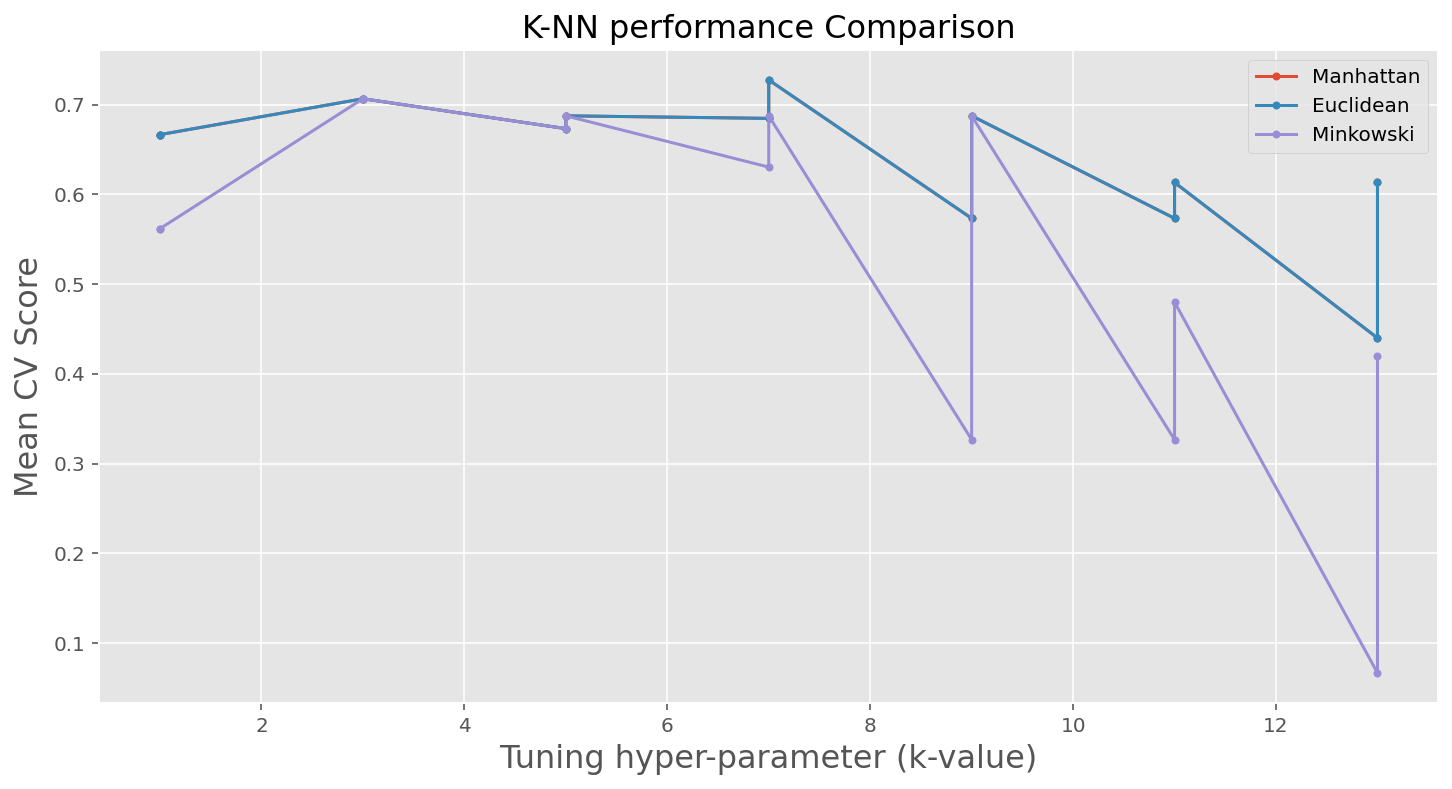

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 6))
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['knn__n_neighbors'][:14], temp['f1_score'][:14], marker = '.', label = i)
   
plt.legend()
plt.title("K-NN performance Comparison", fontsize=16)
plt.xlabel(" Tuning hyper-parameter (k-value) ", fontsize=16)
plt.ylabel("Mean CV Score", fontsize=16)
plt.show()


We observe that the best set of hyperparameters is as follows: Minkowski metric with a k = 3.


## Conclusion - K-NN hyperparameters

(1) Number of neighbors k = 3.

(2) Metric = Manhattan (p = 2)

(3) F1_score = 48% and std: 26%

Let's test the perfomance of other algorithms.

# 2. Using other algorithms: SVM? or Logistic Regression?, Neural Network, and randomForest

In this second part, we train three ML classifiers: Support Vector Machine (SVM) ?? / logistic regression ??, Neural Network (NN), and RandomForest using GridSearch.


## 2.1 Shall we use SVM or Logistic Regression?

Assumption: Given that the number of features, n == 30, is less than the number of training samples (between 10 000 and 20 000 depending on the training size we will chose), the SVM with Gaussian Kernel is more likely to perform better than the logistic regression. In any case, the output of GridSearch will confirm it or no.  


## 2.2 Train Hyperparameter tuning of SVM, NN, and randomForest

We wrote the scripts below to set all the parameters of each classifier and to run them once using GridSearch.

In [35]:
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params': {
             'C': [1, 100, 1000],
             'gamma': [0, 0.1, 0.01,0.001, 0.0001, 0.00001, 20],
             'kernel': ['linear', 'rbf', 'sigmoid', 'poly']    
        }
    },
    'neural_network': {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes': [[5], [10, 5],[10, 5, 5], [10, 20, 20]],
            'activation': ['logistic', 'relu', 'tanh'],
            'solver': ['lbfgs','sgd','adam'],
            'max_iter': [50, 100, 200, 300, 1000]
            }
    },
    'random_forest': {
        'model': RandomForestClassifier(n_jobs=6),
        'params':{
            'criterion': ['gini','entropy'],
            'max_depth': list(range(1, 20)),
            'max_features': [10, 20, X.shape[1]],
            'n_estimators': list(range(1, 20))
        }
    }  
}

In [36]:
scores = []

cv_method = RepeatedStratifiedKFold(n_splits = 5,
                                   n_repeats = 2,
                                   random_state = 1)

print("Fitting the classifiers to the training set")
t0 = time()
for model_name, classifier in model_params.items():
    gs_ML = GridSearchCV(estimator = classifier['model'], 
                         param_grid = classifier['params'], 
                         cv = cv_method,
                         scoring = 'f1',
                         n_jobs = num_cpus -1,
                         verbose = 3)    
    gs_ML.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': gs_ML.best_score_,
        'best_params': gs_ML.best_params_,
        'cv_results': gs_ML.cv_results_
    })
print("Done in %0.3fs " % (time() - t0))

Fitting the classifiers to the training set
Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done 191 tasks      | elapsed:    5.8s
[Parallel(n_jobs=7)]: Done 400 tasks      | elapsed:  1.1min
[Parallel(n_jobs=7)]: Done 624 tasks      | elapsed:  4.1min
[Parallel(n_jobs=7)]: Done 840 out of 840 | elapsed: 13.8min finished


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=7)]: Done 114 tasks      | elapsed:   30.9s
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 498 tasks      | elapsed:  3.1min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  4.7min
[Parallel(n_jobs=7)]: Done 1138 tasks      | elapsed:  7.5min
[Parallel(n_jobs=7)]: Done 1554 tasks      | elapsed: 10.2min
[Parallel(n_jobs=7)]: Done 1800 out of 1800 | elapsed: 12.3min finished


Fitting 10 folds for each of 2166 candidates, totalling 21660 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done 254 tasks      | elapsed:    7.4s
[Parallel(n_jobs=7)]: Done 414 tasks      | elapsed:   15.6s
[Parallel(n_jobs=7)]: Done 638 tasks      | elapsed:   29.7s
[Parallel(n_jobs=7)]: Done 926 tasks      | elapsed:   48.8s
[Parallel(n_jobs=7)]: Done 1278 tasks      | elapsed:  1.3min
[Parallel(n_jobs=7)]: Done 1694 tasks      | elapsed:  2.2min
[Parallel(n_jobs=7)]: Done 2174 tasks      | elapsed:  3.0min
[Parallel(n_jobs=7)]: Done 2718 tasks      | elapsed:  4.2min
[Parallel(n_jobs=7)]: Done 3326 tasks      | elapsed:  5.7min
[Parallel(n_jobs=7)]: Done 3998 tasks      | elapsed:  7.4min
[Parallel(n_jobs=7)]: Done 4734 tasks      | elapsed:  8.9min
[Parallel(n_jobs=7)]: Done 5534 tasks      | elapsed: 10.7min
[Parallel(n_jobs=7)]: Done 6398 tasks      | elapsed: 12.9min
[Parallel(n_jobs=7)]: Done 7326 tasks      | elapsed: 15.0min


Done in 4483.598s 


In [53]:
import joblib
model_KNN = joblib.load('model_best_KNN.pkl')
model_KNN

Pipeline(steps=[('fselector', SelectKBest()),
                ('knn',
                 KNeighborsClassifier(n_jobs=7, n_neighbors=7, p=1,
                                      weights='distance'))])

## The optimal parameters are...

It is clear that the F1-score of NN (approx 83%) outperformed KNN (approx. 78%), SVM (approx. 75%), randomForest (approx. 63%), and decisionTree (approx. 68%) classifiers.

### Can we imporove the performance of the Neural Network model? Why is the SVM, KNN, and randomForest are performing so poorly? I was expected the performance of the DecisionTree to be less than the randomForest one.

In [41]:
# Append KNN parameters
scores.append({
    'model': 'K-NN',
    'best_score': gs_pipe_KNN.best_score_,
    'best_params': gs_pipe_KNN.best_params_
}) 

df = pd.DataFrame(scores,columns = ['model', 'best_score', 'best_params'])

df = df.sort_values(by = 'best_score', ascending=False)
df

,model,best_score,best_params
3,K-NN,0.727619,"{'fselector__k': 10, 'fselector__score_func': ..."
0,svm,0.715714,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}"
1,neural_network,0.677381,"{'activation': 'tanh', 'hidden_layer_sizes': [..."
2,random_forest,0.597143,"{'criterion': 'gini', 'max_depth': 12, 'max_fe..."


In [57]:
estimator_SVM = svm.SVC(C = 1000, gamma = 0.0001, kernel ='rbf')
estimator_SVM

SVC(C=1000, gamma=0.0001)

### Predicting test set using the top 2 models



The models have f1_score equal to 1 (100%). This means that the algorithm is guessing that all the training set belong to class 0 (negative)

# Learning Curves: Bias or Variance


Shall we increase the number of training set or the number of features to improve the f1_score of our classifiers ??

To answer this question, we plot the learning curve!



The function 'plot_learning_curve' is copied from scikit-learn: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
        
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [67]:
#Variables
n_jobs = 7
#cv = RepeatedStratifiedKFold(n_splits = 100,
#                                   n_repeats = 10,
#                                   random_state = 1)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)


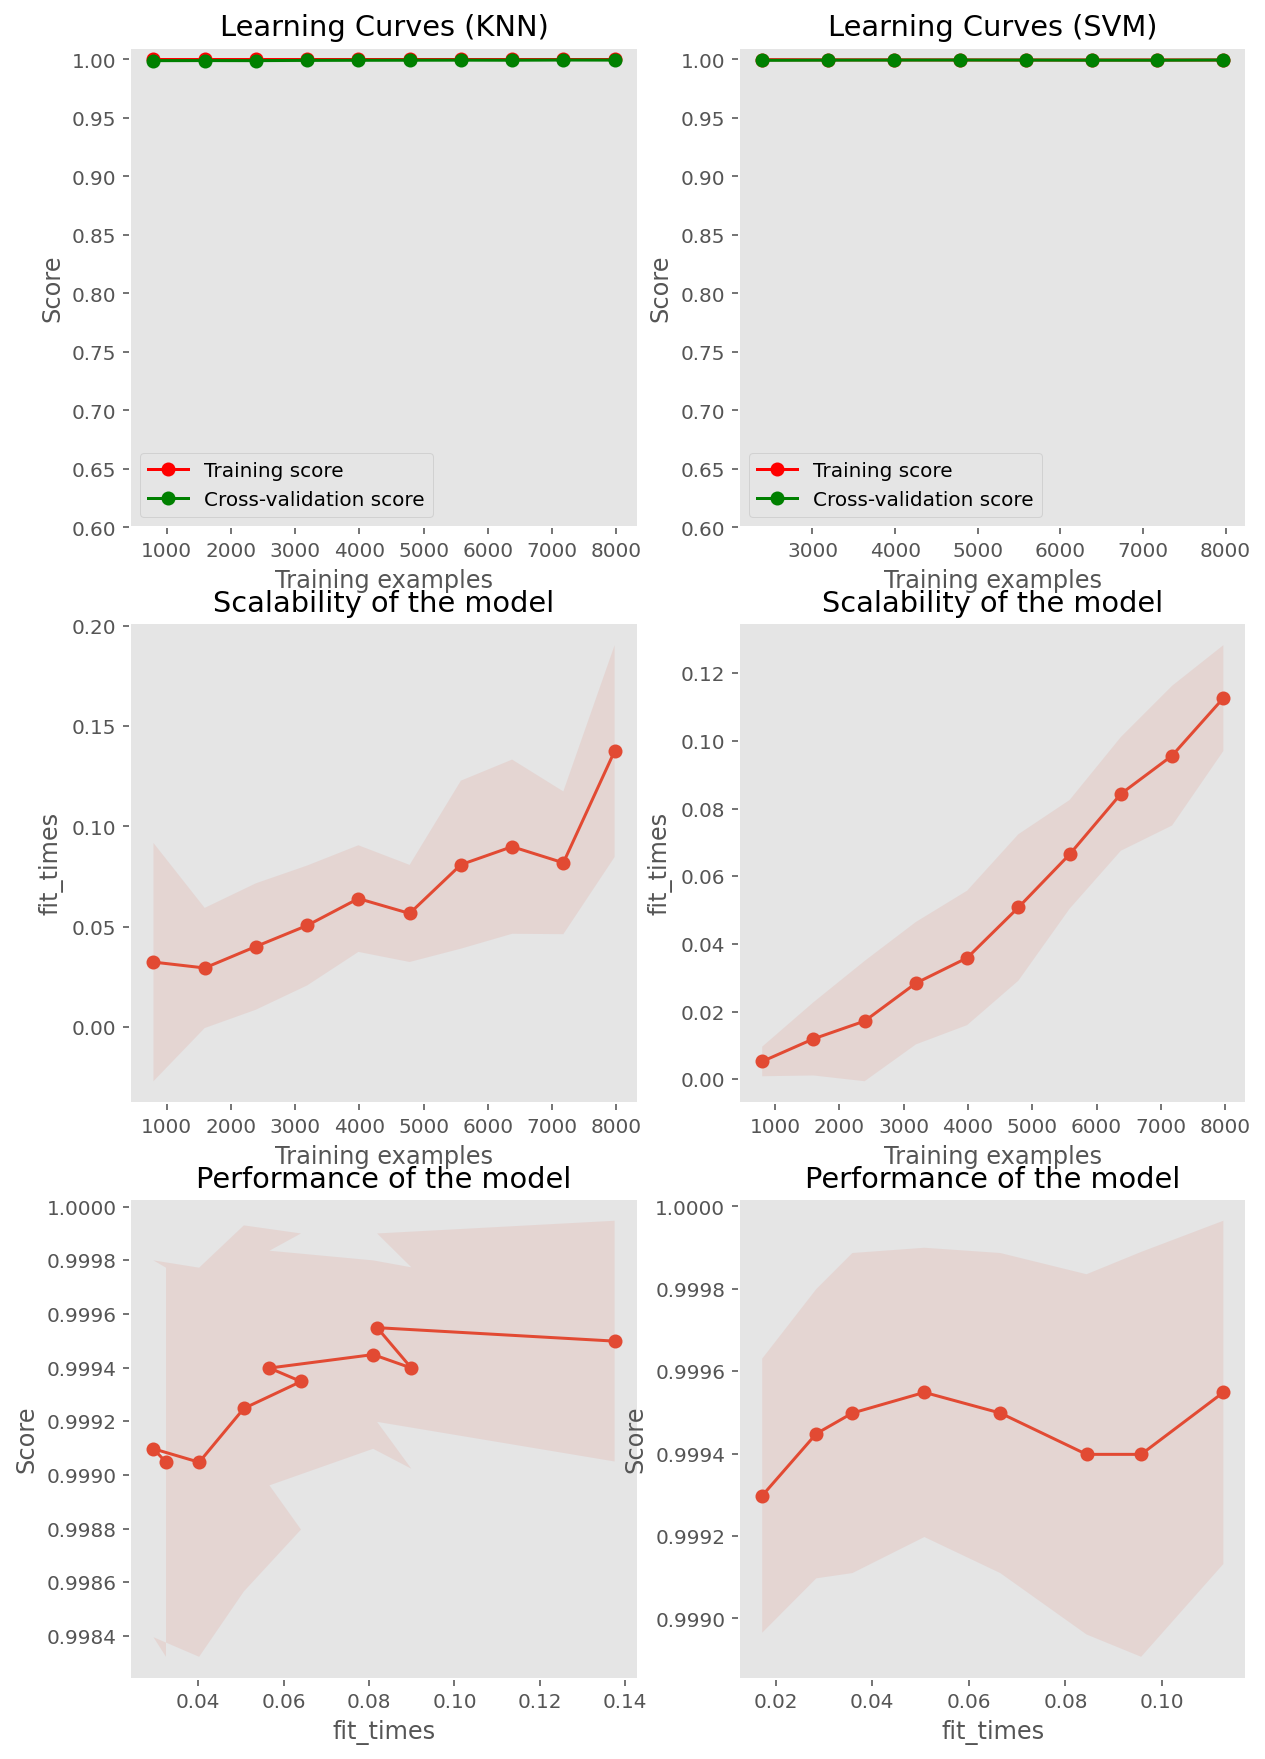

In [68]:
#plot_learning_curve(model_KNN,'KNN', X_train, y_train, n_jobs=7)
#plot_learning_curve(estimator_SVM,'SVM', X_train, y_train, n_jobs=7)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (KNN)"

plot_learning_curve(model_KNN, title, X_train, y_train, axes=axes[:, 0], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=7, train_sizes=np.linspace(.1, 1.0, 10))


title = "Learning Curves (SVM)"
plot_learning_curve(estimator_SVM, title, X_train, y_train, axes=axes[:, 1], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=7, train_sizes=np.linspace(.1, 1.0, 10))

plt.show()

## Define models given hyperparameters



# ============== DO NOT CHECK FURTHER  ======================

## ====================== (work in progress) ================================








## Learning curves of the all the classifiers...

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# Learning curve
## Deciding upon the training set sizes
# The minimum is 1. The max is given by the number of elements in the training set! The training set has 9967 elements, hence the
#max is 9967. However, we should set aside the validation set. We perform this with a ratio 80:20. This lead to the following:
# (1) Training set: 7974
# (2) Validation set: 1993
##cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)



In [ ]:
kfold = StratifiedKFold(n_splits=3, shuffle = False, random_state=None)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X_train, y_train):
    # select rows
    train_X, test_X = X_train[train_ix], X_train[test_ix]
    train_y, test_y = y_train[train_ix], y_train[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
   # print(">>>>>> y train unique", set(train_y), "y test unique", set(test_y))
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    

# Retraining the models

Here, we re-train the models with the whole trainining set (80% of the dataset), not just the 5% we used to determine the hyperparameters, and make prediction on a new dataset (20% test set).

In [ ]:
#  Features
X = credit_card_d;

# Choose 100% of the data for hyperparameters turming
fracs = 1

# Taking 100% of the datasets for testing purposes
X = credit_card_d.sample(frac = fracs, random_state = 1)

# Target (expected class)
y = credit_card["Class"];
y = credit_card["Class"].sample(frac = fracs, random_state = 1)

# Extract the numpy array for processing purposes
X_data = X.values;
y_data = y.values;

###############################
train_ratio = 0.8
#validation_ratio = 0.2
test_ratio = 0.2
###############################

# To keep the same result with every run
np.random.seed(0)

# split 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=1 - train_ratio);

# Compute the mean and standard deviation on a training set [-1 1]
scaler = preprocessing.StandardScaler().fit(X_train)

# Apply the feature scaling on x_train
X_train = scaler.transform(X_train)

# Reapply the same transformation on the test set
X_test = scaler.transform(X_test)

##  K-NN Model deployment: Loading model  for Prediction

We retrieve the saving model object

In [ ]:
import joblib
model_KNN = joblib.load('model_best_KNN.pkl')

In [ ]:
# Re-training the model
model_KNN.fit(X_train, y_train)

# Making new prediction
y_pred = model_KNN.predict(X_test)

f1_knn = f1_score(y_test, y_pred)

print("f1_score Score of the knn classifier for best k values of "+str(3)+" is: "+str(f1_knn))

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

dataFrame = pd.DataFrame(cm, index = ['Normal', 'Fraudulent'], columns = ['Normal', 'Fraudulent'])
sns.heatmap(dataFrame, an
            not = True, cbar = None, cmap = "Blues", fmt = 'g', linewidths = 2, linecolor = "black")
plt.title("Confusion Matrix on Test set")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")

print("True Negative", TN, "\n False Positive ",FP, "\n False Negative",FN , "\n True Positive", TP)

classification = metrics.classification_report(y_test, y_pred)   
print("Classification Report:" "\n", classification)  